# Extracting the data from the photometry table downloaded from NED for each galaxy

We define the path where the photometry tables from NED was saved and the date when those tables was downloaded

In [2]:
from datetime import date
import time
import pandas as pd
import numpy as np
import csv
import astropy.units as u

from astroquery.ipac.ned import Ned
from astropy.table import Table
from pathlib import Path

from matplotlib import pyplot as plt

In [5]:
path_raw = '../Datos/Raw/'
path_phot_data = '../Datos/Phot_Tables/' #In this path was saved the photometry tables for each object
path_votables = '../Datos/VOTables/' #In this path we will save the VOtables for each object
Path(path_votables).mkdir(parents=True, exist_ok=True)
date_samples = 'Mar_03_2022'

sample = pd.read_csv(path_raw+'Obj_Ne-IR_v2_Mar_03_2022.csv')

In [6]:
i=33
Ne_info = ['NeII|NeIII|NeV','NeII|NeV','NeIII|NeV']
ind_sample = [np.where(sample['Ne_IR_info'] == Ne_inf)[0] for Ne_inf in Ne_info]
phot_ned = Table.read(path_phot_data+sample['Name_Id'][ind_sample[0][i]]+'_'+date_samples+'_phot_tables'+'.vot', 
                      format='votable')

In [8]:
sample['Name_Id'][ind_sample[0][i]]

'3C  84'

In [7]:
phot_ned

No.,Observed_Passband,Photometry_Measurement,Uncertainty,Units,Frequency,Flux_Density,Upper_limit_of_uncertainty,Lower_limit_of_uncertainty,Upper_limit_of_Flux_Density,Lower_limit_of_Flux_Density,NED_Uncertainty,NED_Units,Refcode,Significance,Published_frequency,Frequency_Mode,Coordinates_Targeted,Spatial_Mode,Qualifiers,Comments
,,,,,Hz,Jy,,,,,,,,,,,,,,
int32,object,float64,object,object,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object
1,50 GeV-2 TeV (Fermi),8.06e-12,+/-2.72E-12,erg/cm^2^/s,2.48e+26,3.25e-15,1.1e-15,1.1e-15,--,--,+/-1.10E-15,Jy,2016ApJS..222....5A,1 sigma,1.025 TeV,Broad-band measurement,049.9670 +41.5219 (J2000),Flux integrated from map,,From new raw data; NED frequency assigned to mid-point ofband in keV
2,0.01-1 TeV (Fermi),4.8e-11,+/-3.16E-12,erg/cm^2^/s,1.22e+26,3.93e-14,2.59e-15,2.59e-15,--,--,+/-2.59E-15,Jy,2017ApJS..232...18A,1 sigma,0.51 TeV,Broad-band measurement,049.959995 +41.512283 (J2000),From fitting to map,,From reprocessed raw data; NED frequency assigned tomid-point of band in keV
3,400 GeV (Whipple),--,<0.29E-11,erg cm^-2^ s^-1^,9.67e+25,--,--,--,3e-15,--,<3.00E-15,Jy,2006ApJ...644..148P,90% confidence,400 GeV,Broad-band measurement,03 19 48 +41 30 42 (J2000),Flux integrated from map,,From new raw data
4,100 MeV-100 GeV LAT,1.741e-10,+/-8.1E-12,erg/s/cm^2^,1.21e+25,1.44e-12,6.69e-14,6.69e-14,--,--,+/-6.69E-14,Jy,2010ApJS..188..405A,uncertainty,50050 MeV,Broad-band measurement,049.941 +41.508 (J2000),From fitting to map,,From new raw data; NED frequency assigned to mid-point ofband in keV
5,0.1-100 GeV (Fermi),1.737e-10,+/-6.2E-12,erg/cm^2^/s,1.21e+25,1.44e-12,5.12e-14,5.12e-14,--,--,+/-5.12E-14,Jy,2012ApJS..199...31N,1 sigma,50.05 GeV,Broad-band measurement,049.965 +41.513 (J2000),Modelled datum,Variable,From new raw data; NED frequency assigned to mid-point ofband in keV
6,0.1-100 GeV (Fermi),1.991e-10,+/-3.9E-12,erg/cm^2^/s,1.21e+25,1.65e-12,3.22e-23,3.22e-23,--,--,+/-3.22E-23,Jy,2015ApJS..218...23A,1 sigma,50.05 GeV,Broad-band measurement,049.959 +41.514 (J2000),From fitting to map,Variable; Gamma=2.08; Mod=LP,From new raw data; NED frequency assigned to mid-point ofband in keV
7,14-195 keV (Swift),6.85e-11,+/-0.28E-11,erg/s/cm^2^,2.53e+19,2.71e-07,1.11e-08,1.11e-08,--,--,+/-1.11E-08,Jy,2010ApJS..186..378T,uncertainty,104.50 keV,Broad-band measurement,049.960 +41.515 (J2000),Flux integrated from map,,From new raw data; NED frequency assigned to mid-point ofband in keV
8,14-195 keV (Swift),1.15e-10,,erg/cm^2^/s,2.53e+19,4.55e-07,--,--,--,--,,Jy,2008ApJ...681..113T,no uncertainty reported,104.50 keV,Broad-band measurement,049.9507 +41.5117 (J2000),Modelled datum,,From new raw data; NED frequency assigned to mid-point ofband in keV


In [13]:
phot_ned[phot_ned['NED_Units']=='Jy'].write(path_votables+sample['Name_Id'][ind_sample[0][i]]+'_'+date_samples+'.vot', 
                                      format='votable',overwrite=True)

phot_t = Table.read(path_votables+sample['Name_Id'][ind_sample[0][i]]+'_'+date_samples+'.vot', format='votable')
phot_t

No.,Observed_Passband,Photometry_Measurement,Uncertainty,Units,Frequency,Flux_Density,Upper_limit_of_uncertainty,Lower_limit_of_uncertainty,Upper_limit_of_Flux_Density,Lower_limit_of_Flux_Density,NED_Uncertainty,NED_Units,Refcode,Significance,Published_frequency,Frequency_Mode,Coordinates_Targeted,Spatial_Mode,Qualifiers,Comments
,,,,,Hz,Jy,,,,,,,,,,,,,,
int32,object,float64,object,object,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object,object
1,50 GeV-2 TeV (Fermi),8.06e-12,+/-2.72E-12,erg/cm^2^/s,2.48e+26,3.25e-15,1.1e-15,1.1e-15,--,--,+/-1.10E-15,Jy,2016ApJS..222....5A,1 sigma,1.025 TeV,Broad-band measurement,049.9670 +41.5219 (J2000),Flux integrated from map,,From new raw data; NED frequency assigned to mid-point ofband in keV
2,0.01-1 TeV (Fermi),4.8e-11,+/-3.16E-12,erg/cm^2^/s,1.22e+26,3.93e-14,2.59e-15,2.59e-15,--,--,+/-2.59E-15,Jy,2017ApJS..232...18A,1 sigma,0.51 TeV,Broad-band measurement,049.959995 +41.512283 (J2000),From fitting to map,,From reprocessed raw data; NED frequency assigned tomid-point of band in keV
3,400 GeV (Whipple),--,<0.29E-11,erg cm^-2^ s^-1^,9.67e+25,--,--,--,3e-15,--,<3.00E-15,Jy,2006ApJ...644..148P,90% confidence,400 GeV,Broad-band measurement,03 19 48 +41 30 42 (J2000),Flux integrated from map,,From new raw data
4,100 MeV-100 GeV LAT,1.741e-10,+/-8.1E-12,erg/s/cm^2^,1.21e+25,1.44e-12,6.69e-14,6.69e-14,--,--,+/-6.69E-14,Jy,2010ApJS..188..405A,uncertainty,50050 MeV,Broad-band measurement,049.941 +41.508 (J2000),From fitting to map,,From new raw data; NED frequency assigned to mid-point ofband in keV
5,0.1-100 GeV (Fermi),1.737e-10,+/-6.2E-12,erg/cm^2^/s,1.21e+25,1.44e-12,5.12e-14,5.12e-14,--,--,+/-5.12E-14,Jy,2012ApJS..199...31N,1 sigma,50.05 GeV,Broad-band measurement,049.965 +41.513 (J2000),Modelled datum,Variable,From new raw data; NED frequency assigned to mid-point ofband in keV
6,0.1-100 GeV (Fermi),1.991e-10,+/-3.9E-12,erg/cm^2^/s,1.21e+25,1.65e-12,3.22e-23,3.22e-23,--,--,+/-3.22E-23,Jy,2015ApJS..218...23A,1 sigma,50.05 GeV,Broad-band measurement,049.959 +41.514 (J2000),From fitting to map,Variable; Gamma=2.08; Mod=LP,From new raw data; NED frequency assigned to mid-point ofband in keV
7,14-195 keV (Swift),6.85e-11,+/-0.28E-11,erg/s/cm^2^,2.53e+19,2.71e-07,1.11e-08,1.11e-08,--,--,+/-1.11E-08,Jy,2010ApJS..186..378T,uncertainty,104.50 keV,Broad-band measurement,049.960 +41.515 (J2000),Flux integrated from map,,From new raw data; NED frequency assigned to mid-point ofband in keV
8,14-195 keV (Swift),1.15e-10,,erg/cm^2^/s,2.53e+19,4.55e-07,--,--,--,--,,Jy,2008ApJ...681..113T,no uncertainty reported,104.50 keV,Broad-band measurement,049.9507 +41.5117 (J2000),Modelled datum,,From new raw data; NED frequency assigned to mid-point ofband in keV


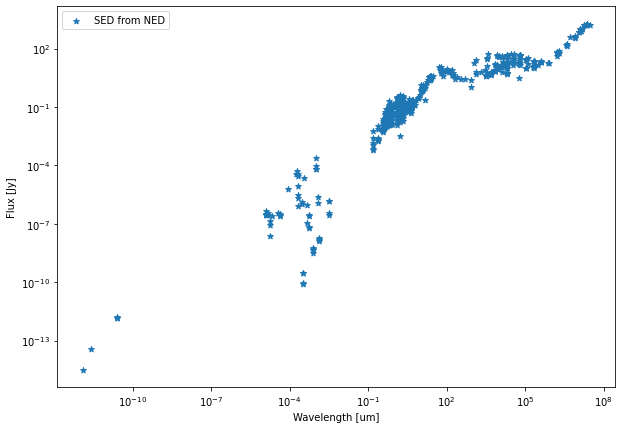

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(phot_t['Frequency'].to(u.micron, equivalencies=u.spectral()), 
            phot_t['Flux_Density'], marker='*', label='SED from NED')
plt.loglog()
plt.xlabel('Wavelength [um]')
plt.ylabel('Flux [Jy]')
plt.legend()
plt.show()

In [ ]:
NEDFilters = ['2-10 keV (XMM)', '0.5-2 keV (XMM)', 'FUV (GALEX)', 'NUV (GALEX)', 'u (SDSS) AB', 
              'g (SDSS) AB', 'r (SDSS) AB', 'i (SDSS) AB', 'z (SDSS) AB', 'J (2MASS) AB', 
              'H (2MASS) AB', 'Ks (2MASS) AB', 'W1 (WISE)', 'W2 (WISE)', 'W3 (WISE)', 'W4 (WISE)',
              '3.6 microns (IRAC)', '4.5 microns (IRAC)', '5.8 microns (IRAC)', '8.0 microns (IRAC)',
              '12 microns (IRAS)', '25 microns (IRAS)', '60 microns (IRAS)', '100 microns (IRAS)',
              '24 microns (MIPS)', '70 microns (MIPS)', '160 microns (MIPS)', '70 microns (PACS)', 
              '100 microns (PACS)', '160 microns (PACS)', '250 microns (SPIRE)', '350 microns (SPIRE)', 
              '500 microns (SPIRE)', '4.89 GHz (VLA)', '1.46 GHz (VLA)', '1.4GHz']

In [ ]:
band

In [ ]:
c = [(a + 2) for a in range(10)] 

In [ ]:
c